In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import nltk

In [2]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
tweets_df = pd.read_csv("Resources/Tweets.csv")
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#check for the shape of the dataframe and null values
print("Shape", tweets_df.shape)
print("null entries per column \n", tweets_df.isna().sum())

Shape (14640, 15)
null entries per column 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [5]:
#find the % of null entries per column
print("Percent of null entries")
((tweets_df.isnull() | tweets_df.isna()).sum() * 100 / tweets_df.index.size).round(2)

Percent of null entries


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [6]:
#get rid of unnecessary columns
del tweets_df['airline_sentiment_gold']
del tweets_df['negativereason_gold']

In [7]:
del tweets_df['tweet_coord']
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
#find the total tweets per airline
print("Total number of tweets per airline \n", tweets_df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of tweets per airline 
 airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


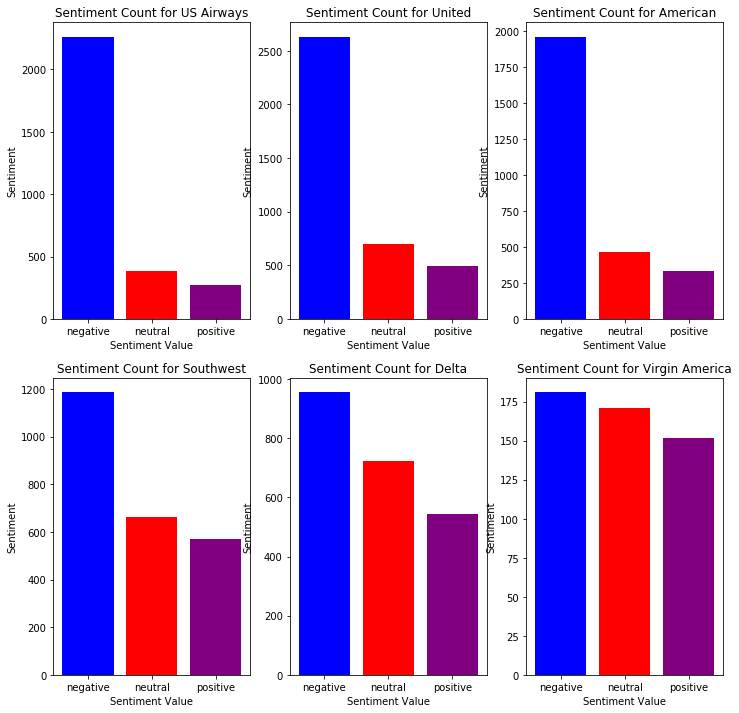

In [9]:
#create a bargraph representing sentiments and airlines
airlines = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
plt.figure(1, figsize=(12,12))
for i in airlines:
    indices = airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_tweets_df = tweets_df[tweets_df['airline'] == i]
    count = new_tweets_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index, count, color=['blue', 'red', 'purple'])
    plt.xticks(Index, ['negative', 'neutral', 'positive'])
    plt.ylabel('Sentiment')
    plt.xlabel('Sentiment Value')
    plt.title('Sentiment Count for ' + i)

In [10]:
#United, US airways, and American have mostly negative tweets while virgin america has the most neutral tweets

In [11]:
#use wordcloud to find the most frequently used words in all of the tweets
from wordcloud import WordCloud, STOPWORDS

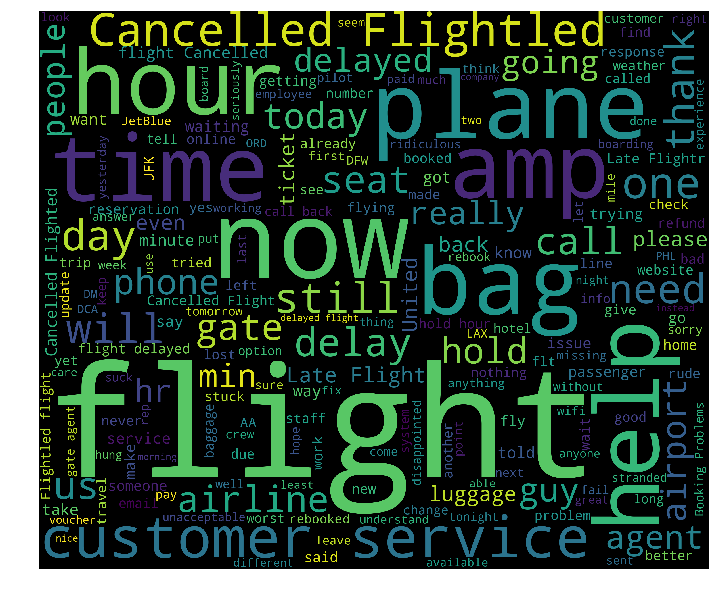

In [12]:
#negative wordcloud
new_tweets_df = tweets_df[tweets_df['airline_sentiment'] == 'negative']
words = ' '.join(new_tweets_df['text'])
clean_words = " ".join([word for word in words.split()
                       if 'http' not in word
                           and not word.startswith('@')
                           and word != 'RT'
                       ])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = 'black',
                     width=3000,
                     height=2500
                     ).generate(clean_words)
plt.figure(1, figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

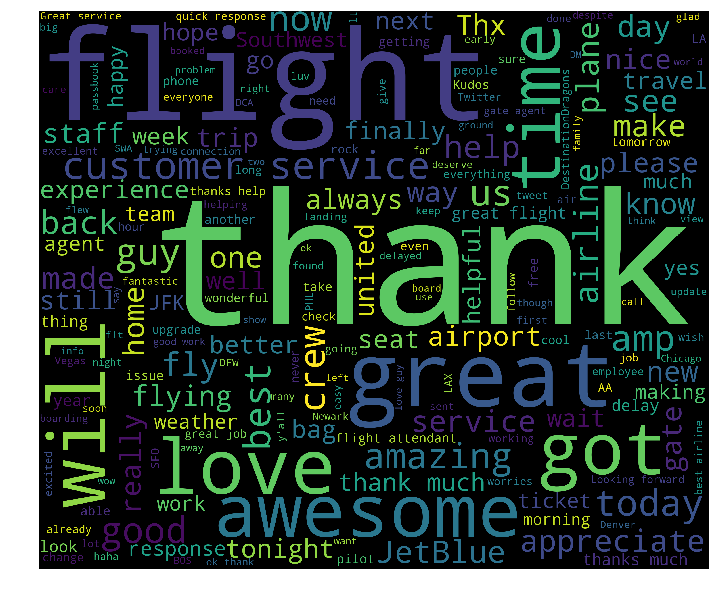

In [13]:
#positive wordcloud
new_tweets_df = tweets_df[tweets_df['airline_sentiment'] == 'positive']
words = ' '.join(new_tweets_df['text'])
clean_words = " ".join([word for word in words.split()
                       if 'http' not in word
                           and not word.startswith('@')
                           and word != 'RT'
                       ])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = 'black',
                     width=3000,
                     height=2500
                     ).generate(clean_words)
plt.figure(1, figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(clean_words))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

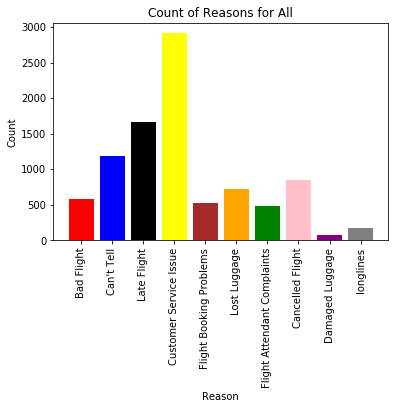

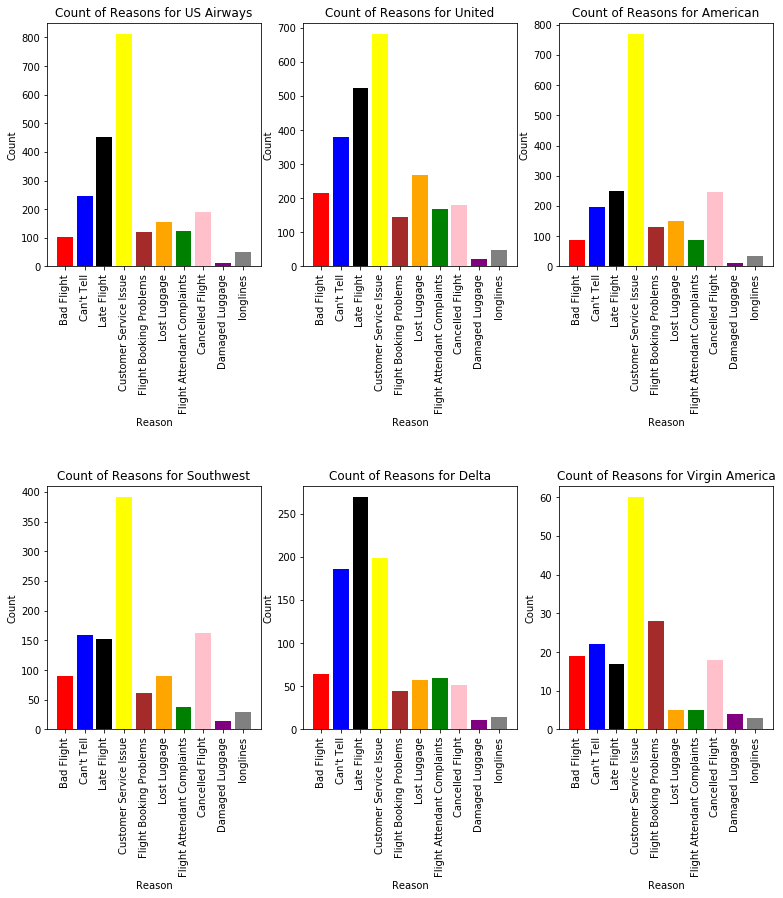

In [17]:
#get the number of negative reasons
tweets_df['negativereason'].nunique()

NR_Count=dict(tweets_df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=tweets_df
    else:
        a=tweets_df[tweets_df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(tweets_df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','blue','black','yellow','brown', 'orange','green','pink','purple','gray'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [18]:
#pre processing tweet text data

In [19]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [22]:
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bchik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
tweets_df['clean_tweet']=tweets_df['text'].apply(lambda x: tweet_to_words(x))

In [25]:
train,test = train_test_split(tweets_df,test_size=0.2,random_state=42)


In [26]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [28]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

In [31]:
from mlxtend.plotting import plot_confusion_matrix

Accuracy of DecisionTreeClassifieris 0.6779371584699454
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79      1845
     neutral       0.43      0.40      0.42       624
    positive       0.57      0.57      0.57       459

    accuracy                           0.68      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.67      0.68      0.68      2928



<Figure size 432x288 with 0 Axes>

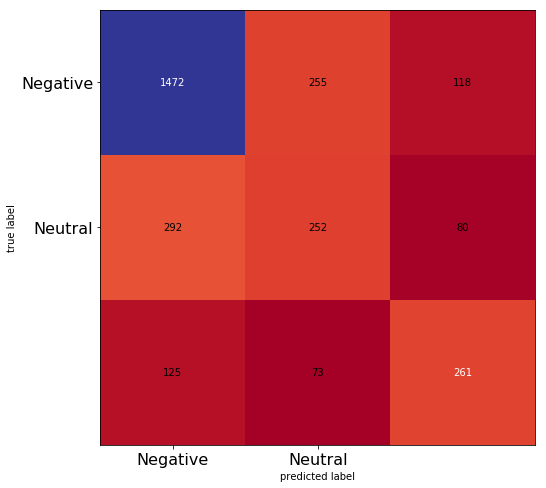

Accuracy of RandomForestClassifieris 0.7742486338797814
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2095
     neutral       0.46      0.59      0.52       448
    positive       0.61      0.73      0.67       385

    accuracy                           0.77      2928
   macro avg       0.66      0.71      0.68      2928
weighted avg       0.80      0.77      0.78      2928



<Figure size 432x288 with 0 Axes>

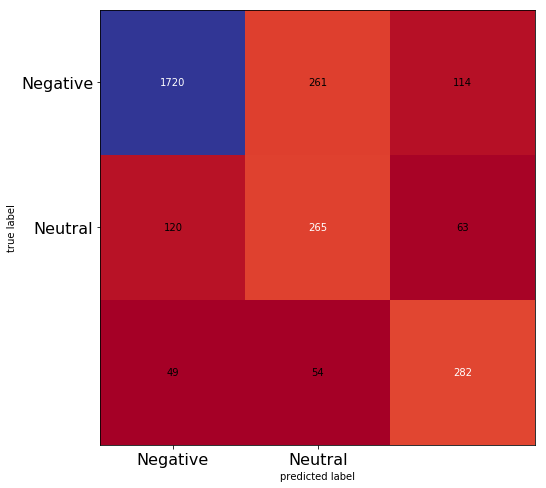

In [38]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.RdYlBu)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()